# ANN Regression of a combine cycle power plant

The Combined Cycle Power Plant dataset contains 9,568 data points collected over a period of six years (2006-2011) from a power plant operating at full load. The data includes hourly average ambient variables, including:

* Temperature (AT), ranging from 1.81°C to 37.11°C
* Ambient Pressure (AP), ranging from 992.89 to 1033.30 milibar
* Relative Humidity (RH), ranging from 25.56% to 100.16%
* Exhaust Vacuum (V), ranging from 25.36 to 81.56 cm Hg
* Net hourly electrical energy output (PE), ranging from 420.26 to 495.76 MW
* The ANN would be trained on the 9,568 data points in the dataset. Once the ANN is trained, it can be used to predict the net hourly electrical energy output for new sets of ambient variables. This can be useful for power plant operators who want to predict the amount of electrical energy that will be produced by the plant.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
data = pd.read_excel('Folds5x2_pp.xlsx')
data

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
data.head(10)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


In [5]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


# Exploratory Data analysis

Create a correlation plot to visualize the relationship between the net hourly electrical energy output (PE) and each individual feature

<Axes: >

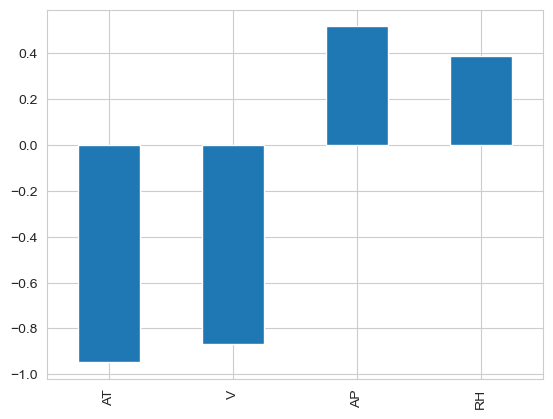

In [6]:
data.corr()['PE'][:-1].plot(kind='bar')

There is a strong negative correlation between the ambient temperature (AT) and exhaust vacuum (V) with the net hourly electrical energy output (PE). On the other hand, AP (Ambient Pressure) and RH (Relative Humidity) show a relatively weak positive correlation with PE.


Generate a scatterplot depicting the relationship between ambient temperature (AT) and net hourly electrical energy output (PE)

<Axes: xlabel='AT', ylabel='PE'>

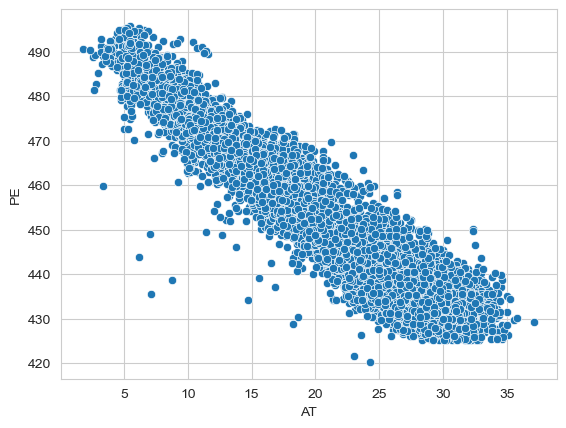

In [7]:
sns.scatterplot(x='AT', y='PE', data=data)

Generate a scatter plot representing the relationship between Ambient Pressure (AP) and net hourly electrical energy output (PE)

<Axes: xlabel='AP', ylabel='PE'>

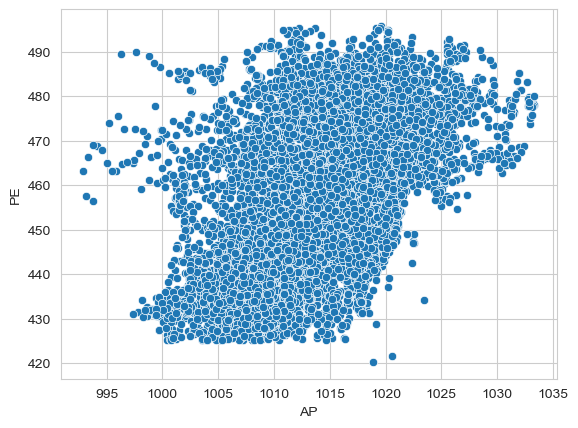

In [8]:
sns.scatterplot(x='AP', y='PE', data=data)

# Train and Test spliting data

The dataset will be divided into a train set and a test set, where the target feature (the output we want to predict) is the net hourly electrical energy output (PE)

In [9]:
target_variable = ['PE']
predictors = ['AT', 'V', 'AP', 'RH']
x=data[predictors].values
y=data[target_variable].values

In [10]:
x

array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       ...,
       [  31.32,   74.33, 1012.92,   36.48],
       [  24.48,   69.45, 1013.86,   62.39],
       [  21.6 ,   62.52, 1017.23,   67.87]])

In [11]:
y

array([[463.26],
       [444.37],
       [488.56],
       ...,
       [429.57],
       [435.74],
       [453.28]])

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Quick sanity check with the shapes of Training and testing datasets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7654, 4)
(7654, 1)
(1914, 4)
(1914, 1)


MinMaxScaler is used to normalize the features by scaling them to a specific range, typically between 0 and 1.

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Part-2 : Building the ANN

Intializing ANN

Lets quickly understand the hyperparameters in below code snippets

* units=6: This means we are creating a layer with five neurons in it. Each of these six neurons will be receiving the values of inputs, for example, the values of ‘AT’ will be passed to all six neurons, similarly all other columns.

* input_dim=4: This means there are seven predictors in the input data which is expected by the first layer. If you see the second dense layer, we don’t specify this value, because the Sequential model passes this information further to the next layers.

* kernel_initializer=’normal’: When the Neurons start their computation, some algorithm has to decide the value for each weight. This parameter specifies that. You can choose different values for it like ‘normal’ or ‘glorot_uniform’.

* activation=’relu’: This specifies the activation function for the calculations inside each neuron. You can choose values like ‘relu’, ‘tanh’, ‘sigmoid’, etc.

* batch_size=32: This specifies how many rows will be passed to the Network in one go after which the SSE calculation will begin and the neural network will start adjusting its weights based on the errors. When all the rows are passed in the batches of 32 rows each as specified in this parameter, then we call that 1-epoch. Or one full data cycle. This is also known as mini-batch gradient descent. A small value of batch_size will make the ANN look at the data slowly, like 2 rows at a time or 4 rows at a time which could lead to overfitting, as compared to a large value like 20 or 50 rows at a time, which will make the ANN look at the data fast which could lead to underfitting. Hence a proper value must be chosen using hyperparameter tuning.

* Epochs=100: The same activity of adjusting weights continues for 100 times, as specified by this parameter. In simple terms, the ANN looks at the full training data 100 times and adjusts its weights.

In [14]:
ann = tf.keras.models.Sequential()

Adding the input layer and the first hidden layer

In [15]:
ann.add(tf.keras.layers.Dense(units=6,input_dim=4, activation='relu'))

Adding the second hidden layer

In [16]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

Adding the output layer

In [17]:
ann.add(tf.keras.layers.Dense(units=1))

# Part-3 Tranning the ANN

Compiling the ANN

In [18]:
ann.compile(optimizer='adam', loss='mean_squared_error')

Training the ANN model on the Training set

In [19]:
ann.fit(x_train,y_train, batch_size=32,validation_data=(x_test,y_test), epochs=400)

Epoch 1/400
240/240 [==============================] - 0s 586us/step - loss: 205842.7031 - val_loss: 203132.1250
Epoch 2/400
240/240 [==============================] - 0s 368us/step - loss: 191982.7812 - val_loss: 175866.9375
Epoch 3/400
240/240 [==============================] - 0s 361us/step - loss: 148897.2969 - val_loss: 118342.0703
Epoch 4/400
240/240 [==============================] - 0s 361us/step - loss: 84902.4141 - val_loss: 53812.5742
Epoch 5/400
240/240 [==============================] - 0s 360us/step - loss: 31279.2441 - val_loss: 14979.6807
Epoch 6/400
240/240 [==============================] - 0s 361us/step - loss: 8081.0679 - val_loss: 4474.8652
Epoch 7/400
240/240 [==============================] - 0s 364us/step - loss: 3603.1479 - val_loss: 3233.4783
Epoch 8/400
240/240 [==============================] - 0s 365us/step - loss: 3154.7285 - val_loss: 3058.4915
Epoch 9/400
240/240 [==============================] - 0s 364us/step - loss: 3030.1479 - val_loss: 2938.7600
Epo

240/240 [==============================] - 0s 372us/step - loss: 21.3753 - val_loss: 20.0606
Epoch 77/400
240/240 [==============================] - 0s 361us/step - loss: 21.3763 - val_loss: 19.8149
Epoch 78/400
240/240 [==============================] - 0s 358us/step - loss: 21.3381 - val_loss: 20.4860
Epoch 79/400
240/240 [==============================] - 0s 356us/step - loss: 21.4138 - val_loss: 19.8199
Epoch 80/400
240/240 [==============================] - 0s 358us/step - loss: 21.2298 - val_loss: 19.7982
Epoch 81/400
240/240 [==============================] - 0s 356us/step - loss: 21.2538 - val_loss: 19.7701
Epoch 82/400
240/240 [==============================] - 0s 356us/step - loss: 21.1976 - val_loss: 19.7631
Epoch 83/400
240/240 [==============================] - 0s 361us/step - loss: 21.2508 - val_loss: 19.7638
Epoch 84/400
240/240 [==============================] - 0s 358us/step - loss: 21.2542 - val_loss: 20.0603
Epoch 85/400
240/240 [==============================] - 0s 

Epoch 153/400
240/240 [==============================] - 0s 362us/step - loss: 21.1160 - val_loss: 20.1702
Epoch 154/400
240/240 [==============================] - 0s 357us/step - loss: 21.2277 - val_loss: 19.7582
Epoch 155/400
240/240 [==============================] - 0s 357us/step - loss: 21.1920 - val_loss: 19.8077
Epoch 156/400
240/240 [==============================] - 0s 356us/step - loss: 21.2864 - val_loss: 19.8523
Epoch 157/400
240/240 [==============================] - 0s 359us/step - loss: 21.2038 - val_loss: 19.8842
Epoch 158/400
240/240 [==============================] - 0s 358us/step - loss: 21.3236 - val_loss: 19.7989
Epoch 159/400
240/240 [==============================] - 0s 357us/step - loss: 21.2822 - val_loss: 19.8632
Epoch 160/400
240/240 [==============================] - 0s 358us/step - loss: 21.2646 - val_loss: 19.8220
Epoch 161/400
240/240 [==============================] - 0s 367us/step - loss: 21.4230 - val_loss: 19.7508
Epoch 162/400
240/240 [==============

240/240 [==============================] - 0s 361us/step - loss: 21.3058 - val_loss: 19.7543
Epoch 230/400
240/240 [==============================] - 0s 357us/step - loss: 21.2609 - val_loss: 19.8699
Epoch 231/400
240/240 [==============================] - 0s 358us/step - loss: 21.1974 - val_loss: 19.7824
Epoch 232/400
240/240 [==============================] - 0s 358us/step - loss: 21.2544 - val_loss: 19.9335
Epoch 233/400
240/240 [==============================] - 0s 358us/step - loss: 21.2479 - val_loss: 20.1350
Epoch 234/400
240/240 [==============================] - 0s 418us/step - loss: 21.2775 - val_loss: 19.7346
Epoch 235/400
240/240 [==============================] - 0s 357us/step - loss: 21.1441 - val_loss: 20.2183
Epoch 236/400
240/240 [==============================] - 0s 356us/step - loss: 21.1852 - val_loss: 19.7393
Epoch 237/400
240/240 [==============================] - 0s 360us/step - loss: 21.3331 - val_loss: 19.7715
Epoch 238/400
240/240 [============================

240/240 [==============================] - 0s 363us/step - loss: 21.3004 - val_loss: 20.0328
Epoch 306/400
240/240 [==============================] - 0s 359us/step - loss: 21.3018 - val_loss: 19.7588
Epoch 307/400
240/240 [==============================] - 0s 358us/step - loss: 21.5473 - val_loss: 19.7588
Epoch 308/400
240/240 [==============================] - 0s 360us/step - loss: 21.2473 - val_loss: 19.7327
Epoch 309/400
240/240 [==============================] - 0s 359us/step - loss: 21.2358 - val_loss: 20.2982
Epoch 310/400
240/240 [==============================] - 0s 357us/step - loss: 21.3193 - val_loss: 19.7310
Epoch 311/400
240/240 [==============================] - 0s 358us/step - loss: 21.2487 - val_loss: 19.7589
Epoch 312/400
240/240 [==============================] - 0s 357us/step - loss: 21.2656 - val_loss: 19.9958
Epoch 313/400
240/240 [==============================] - 0s 359us/step - loss: 21.2367 - val_loss: 20.0554
Epoch 314/400
240/240 [============================

240/240 [==============================] - 0s 362us/step - loss: 21.2949 - val_loss: 19.8455
Epoch 382/400
240/240 [==============================] - 0s 361us/step - loss: 21.1936 - val_loss: 20.0684
Epoch 383/400
240/240 [==============================] - 0s 357us/step - loss: 21.4032 - val_loss: 21.3745
Epoch 384/400
240/240 [==============================] - 0s 358us/step - loss: 21.3564 - val_loss: 19.9203
Epoch 385/400
240/240 [==============================] - 0s 358us/step - loss: 21.2298 - val_loss: 19.7846
Epoch 386/400
240/240 [==============================] - 0s 359us/step - loss: 21.3020 - val_loss: 19.7353
Epoch 387/400
240/240 [==============================] - 0s 359us/step - loss: 21.2487 - val_loss: 20.0175
Epoch 388/400
240/240 [==============================] - 0s 357us/step - loss: 21.2232 - val_loss: 19.7894
Epoch 389/400
240/240 [==============================] - 0s 358us/step - loss: 21.1479 - val_loss: 19.9554
Epoch 390/400
240/240 [============================

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [21]:
y_pred = ann.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

60/60 [==============================] - 0s 303us/step
[[430.72 431.23]
 [458.15 460.01]
 [462.41 461.14]
 ...
 [469.19 473.26]
 [441.87 438.  ]
 [461.49 463.28]]


Evaluate the model using mean squared error (MSE), mean absolute error (MAE), and explained variance score

In [22]:
mean_absolute_error(y_test, y_pred)

3.5693081323828943

In [23]:
data['PE'].describe()

count    9568.000000
mean      454.365009
std        17.066995
min       420.260000
25%       439.750000
50%       451.550000
75%       468.430000
max       495.760000
Name: PE, dtype: float64

The average net hourly electrical energy output (PE) in the dataset is 454.365009. The Mean Absolute Error (MAE), which measures the average difference between the predicted and actual values of PE, is 3.9484592334902766. This MAE is less than 1% of the mean of PE, indicating that the model's average prediction error is relatively small compared to the average PE value.

In [24]:
explained_variance_score(y_test, y_pred)

0.9324372913490656

The explained variance score of 0.9324372913490656 indicates that approximately 93% of the variance in the target variable (net hourly electrical energy output) can be explained by the independent variables (ambient variables) used in the model.

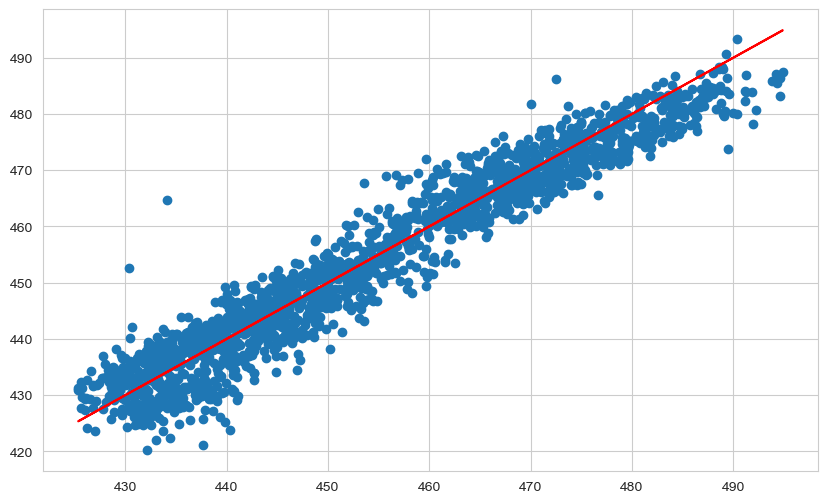

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, 'r')

The scatterplot reveals a strong linear trend, indicating close proximity between the predictions and the true y test.

# Example

Example values of the ambient variables (features) for the power plant prediction model:

* Temperature (AT): 30.5°C
* Ambient Pressure (AP): 1010.2 milibar
* Relative Humidity (RH): 65.3%
* Exhaust Vacuum (V): 50.2 cm Hg

In [26]:
ex = [[30.5, 50.2, 1010.2, 65.3, ]]

In [27]:
ex = scaler.transform(ex)
ex_pred = ann.predict(ex)
ex

1/1 [==============================] - 0s 16ms/step


array([[0.81, 0.44, 0.43, 0.53]])

In [28]:
print('The predicted net hourly electrical energy output: ', ex_pred[0][0], ' MW.')

The predicted net hourly electrical energy output:  434.42883  MW.
